In [1]:
import ase
import ase.db as db
import ccs_fit
import os

os.chdir("/home/thism292/Documents/repos/CsPbBr3_CCS/CCS_fit_2023/DFTB+CCS/")

In [2]:
!ase db DFT.db
!ase db DFTB.db

id|age|user    |formula   |calculator|  energy|natoms| fmax|pbc| volume|charge|    mass| smax
 1| 7h|thism292|Cs4Pb4Br12|vasp      |-714.922|    20|0.014|TTT|800.136| 0.000|2319.270|0.001
 2| 7h|thism292|Cs4Pb4Br12|vasp      |-714.903|    20|0.019|TTT|784.073| 0.000|2319.270|0.002
 3| 7h|thism292|Cs4Pb4Br12|vasp      |-714.835|    20|0.027|TTT|767.733| 0.000|2319.270|0.004
 4| 7h|thism292|Cs4Pb4Br12|vasp      |-714.735|    20|0.011|TTT|751.894| 0.000|2319.270|0.007
 5| 7h|thism292|Cs4Pb4Br12|vasp      |-714.606|    20|0.017|TTT|737.292| 0.000|2319.270|0.009
 6| 7h|thism292|Cs4Pb4Br12|vasp      |-714.434|    20|0.017|TTT|722.525| 0.000|2319.270|0.012
 7| 7h|thism292|Cs4Pb4Br12|vasp      |-714.915|    20|0.014|TTT|802.507| 0.000|2319.270|0.002
 8| 7h|thism292|Cs4Pb4Br12|vasp      |-714.878|    20|0.027|TTT|806.647| 0.000|2319.270|0.004
 9| 7h|thism292|Cs4Pb4Br12|vasp      |-714.823|    20|0.013|TTT|812.580| 0.000|2319.270|0.006
10| 7h|thism292|Cs4Pb4Br12|vasp      |-714.743|    20|0.008|

In [3]:
ccs_fit.ccs_fetch(mode="DFTB", DFT_DB="DFT.db", DFTB_DB="DFTB.db", include_forces=True)

    Fetching data: 100%|███████████████████████████████████████| 79/79 [00:00<00:00, 203.41it/s]


In [4]:
### Generate input.json file
import json

input={
    "General": {
        "interface": "DFTB",
        "merging"  : "True"
    },
    "Twobody": {
                "Xx-Xx": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "rep",
                        "const_type" : "Mono"

                },
                "Br-Br": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "sw",
                        "const_type": "Mono"
                },
                "Pb-Br": {
                        "Rcut": 6.0,
                        "Resolution": 0.05,
                        "Swtype": "sw",
                        "const_type": "Mono"
                }
        }
}
#SAVE TO FILE
with open('CCS_input.json', 'w') as f:
    json.dump(input, f, indent=8)

In [5]:
#RUN FIT
from ccs_fit import ccs_fit

ccs_fit("CCS_input.json")

    Generating one-body information from training-set.
        Added elements:  ['Br', 'Cs', 'Pb']
    Generating two-body potentials from one-body information.
    Adding pair: Br-Cs
    Adding pair: Cs-Cs
    Adding pair: Cs-Pb
    Adding pair: Pb-Pb


Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  Br-Br
    Applying monotonous constraints for pair:  Pb-Br


Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json
Name mismatch in CCS_input.json and structures.json


    Applying monotonous constraints for pair:  Br-Cs
    Applying monotonous constraints for pair:  Cs-Cs
    Applying monotonous constraints for pair:  Cs-Pb
    Applying monotonous constraints for pair:  Pb-Pb
    Merging intervall for pair Br-Br. Number of knots reduced from 52 to 48. 
    Merging intervall for pair Pb-Br. Number of knots reduced from 64 to 27. 
    Merging intervall for pair Br-Cs. Number of knots reduced from 68 to 55. 
    Merging intervall for pair Cs-Cs. Number of knots reduced from 36 to 18. 
    Merging intervall for pair Cs-Pb. Number of knots reduced from 35 to 32. 
    Merging intervall for pair Pb-Pb. Number of knots reduced from 41 to 14. 
    There is linear dependence in stochiometry matrix!
    Removing onebody term: Pb
    Condition number is: 1.1004880984378906e+26 ( 195 331052.12524697726 0.0)


    Finding optimum switch: 100%|███████████████████████████| 1296/1296 [00:39<00:00, 32.77it/s]


    The best switch is (0, 10, 55, 18, 32, 14) with mse: 0.054223 
    Final root mean square error in fit:  0.002026447245442881  (eV/atoms) [NOTE: Only elements specified in Onebody are considered!]


/home/thism292/anaconda3/envs/CsPbBr3_CCS/lib/python3.9/site-packages/ccs_fit/fitting/spline_functions.py:299: RuntimeWarning: invalid value encountered in log
  beta = alpha * r0 + np.log(cc / alpha**2)


In [6]:
from ccs_fit.scripts.ccs_validate import ccs_validate
ccs_validate(mode="DFTB", CCS_params="CCS_params.json", DFT_DB="DFT.db", DFTB_DB="DFTB.db")

  0%|                                                                    | 0/79 [00:00<?, ?it/s]/home/thism292/anaconda3/envs/CsPbBr3_CCS/lib/python3.9/site-packages/ase/utils/__init__.py:62: FutureWarning: Please use atoms.cell.rank instead
  warnings.warn(warning)
100%|██████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 101.55it/s]


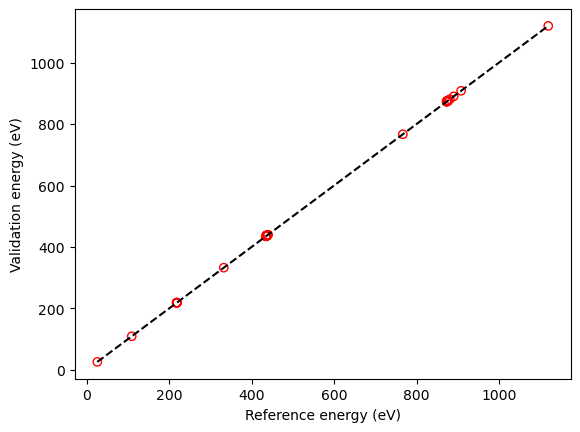

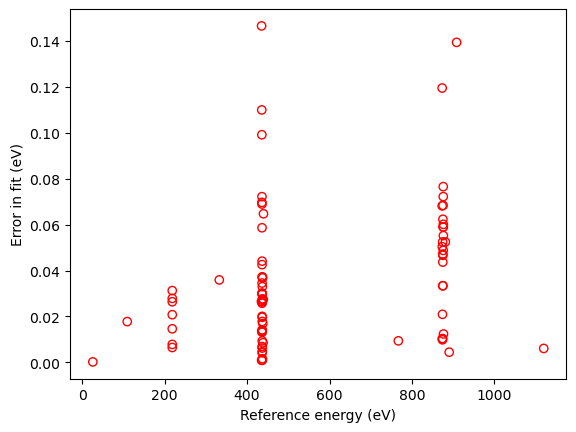

In [7]:
import matplotlib.pyplot as plt
import numpy as np

try:
    err=np.loadtxt("CCS_validate.dat")
    plt.xlabel('Reference energy (eV)')
    plt.ylabel('Validation energy (eV)')
    plt.plot( [min(err[:,0]),max(err[:,0])],[min(err[:,0]),max(err[:,0])],'--',color='black'  )
    plt.scatter(err[:,0],err[:,1],facecolors='none', edgecolors='red')
    plt.show()
    plt.xlabel('Reference energy (eV)')
    plt.ylabel('Error in fit (eV)')
    plt.scatter(err[:,0],err[:,2],facecolors='none', edgecolors='red')
    plt.show()
except:
    pass

## Test calculator for geometry optimisation

In [8]:
import os
import json
from ase import io
from ccs_fit.ase_calculator.ccs_ase_calculator import CCS
from ase.calculators.dftb import Dftb
from ase.calculators.mixing import LinearCombinationCalculator
from ase.optimize import BFGS # FIRE

struct = io.read('DFT.db@-1')

with open('CCS_params.json', 'r') as f:
    CCS_params = json.load(f)

kpts = [2,2,2]

DFTB_calc = Dftb(label='CsPbBr3', atoms=struct,
                slako_dir = "/home/thism292/Documents/repos/CsPbBr3_CCS/Data/DFTB_CCS/DFTB_PARAMS/Cs_w3_00_c9_00_Pb_w3_00_c9_00_Br_w3_00_c9_00/",
                Hamiltonian_SCC='Yes',
                Hamiltonian_SCCTolerance='1.00E-010',
                Driver_='ConjugateGradient',
                Driver_MaxForceComponent='1.00E-008',
                Driver_MaxSteps=1000,
                Hamiltonian_MaxAngularMomentum_='',
                Hamiltonian_MaxAngularMomentum_Cs='"s"',
                Hamiltonian_MaxAngularMomentum_Pb='"p"',
                Hamiltonian_MaxAngularMomentum_Br='"p"',
                Hamiltonian_KPointsAndWeights = 'SupercellFolding {{ {} 0 0 0 {} 0 0 0 {}     0.0 0.0 0.0}}'.format(kpts[0], kpts[1], kpts[2]),
            )

CCS_calc = CCS(CCS_params=CCS_params) 

calcs =[DFTB_calc,CCS_calc]
weights=[1, 0]
calc=LinearCombinationCalculator(calcs, weights) 

# Geometry optimization
# import structure:
struct = io.read('DFT.db@-1')
print(struct)
struct.calc=calc
print(struct.calc)
relax = BFGS(struct, trajectory='opt.traj')
relax.run(fmax=0.01) 

Atoms(symbols='Cs8Pb8Br24', pbc=True, cell=[11.735352, 11.735352, 11.735352], calculator=SinglePointCalculator(...))
LinearCombinationCalculator(Dftb, CCS)
      Step     Time          Energy         fmax
BFGS:    0 17:38:25    -2321.467693        0.0000


True

In [10]:
!ase -T gui opt.traj